# Notebook 3 for ISONE (winter) OSW + Solar Analysis
This notebook is designed to re-perform the analysis of winter months, this time with the addition of current solar resources.

It is largely the same as notebook 1, but additionally reads in the solar resource data from the ISONE website. The solar resource is then added to the wind and both are subtracted from the load profile to understand how renewables enable grid stability in winter months.

**To run, press the play buttons for each grey cell in order!**

**Part 1:**
The first things users need to do is fetch the appropriate data from the ISONE website.

In [1]:
#Step 1: read in the wind file from the ISONE website
import zipfile
import io
import requests
from glob import glob
import pandas as pd

url = "https://www.iso-ne.com/static-assets/documents/2023/05/2023_isone_ver_dataset_2000_2022_rev0.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
folder = "2023_isone_ver_dataset_2000_2022_rev0"
z.extractall(path=f"/content/{folder}")
files = glob(folder + "/*/*.csv")
index = files.index('2023_isone_ver_dataset_2000_2022_rev0/wind/2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv')

#Step 2: Read the CSV file into a dataframe for management/cleaning.
df = pd.read_csv(files[index])

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
df.head()

,LZ,Date,Year,Month,Day,yr_day,yr_wk,day_type,HE1,HE2,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
0,ISONE,01/01/2000,2000,1,1,1,0,WE,0.1182,0.1128,...,0.7474,0.8130,0.8483,0.8691,0.8735,0.8513,0.8644,0.8359,0.7853,0.7326
1,ISONE,01/02/2000,2000,1,2,2,1,WE,0.6034,0.4819,...,0.8502,0.8597,0.8855,0.9102,0.9183,0.9264,0.9357,0.9347,0.9372,0.9372
2,ISONE,01/03/2000,2000,1,3,3,1,WD,0.9358,0.9369,...,0.3960,0.3264,0.2228,0.1880,0.2142,0.2552,0.2616,0.3077,0.3615,0.4225
3,ISONE,01/04/2000,2000,1,4,4,1,WD,0.6101,0.7262,...,0.8515,0.7099,0.6723,0.6208,0.6287,0.5647,0.5804,0.7389,0.8130,0.9185
4,ISONE,01/05/2000,2000,1,5,5,1,WD,0.9231,0.9075,...,0.9225,0.9190,0.9028,0.8953,0.8761,0.8874,0.8830,0.8358,0.7761,0.7067


In [3]:
#Step 4: Create a new dataframe, "wind_data" with just the information we want.

#First, change the "Date" column in the original dataframe to "datetime" format.
#The datetime format allows us to manipulate the dates easily: https://docs.python.org/3/library/datetime.html
df['Date'] = pd.to_datetime(df['Date'])

#Next, create a new dataframe named "wind_data" to copy over just the columns we want.
wind_data = pd.DataFrame()

#Then, copy over the date column, which we have already put in datetime format!
wind_data['Date'] = df['Date'].copy()

#Finally, sum together the CP for every hour of the wind data, then add that as a column to our new dataframe as "Net CP for Fleet".
wind_data['Net CP for OSW Fleet'] = sum([df['HE1'], df['HE2'], df['HE3'], df['HE4'], df['HE5'],
                                        df['HE6'], df['HE7'], df['HE8'], df['HE9'], df['HE10'],
                                        df['HE11'], df['HE12'], df['HE13'], df['HE14'], df['HE15'],
                                        df['HE16'], df['HE17'], df['HE18'], df['HE19'], df['HE20'],
                                        df['HE21'], df['HE22'], df['HE23'], df['HE24']])

#We can print the new dataframe to make sure we have what we want!
print(wind_data)

           Date  Net CP for OSW Fleet
0    2000-01-01               11.9738
1    2000-01-02               16.2638
2    2000-01-03               15.3354
3    2000-01-04               19.2895
4    2000-01-05               21.4297
...         ...                   ...
8396 2022-12-27               10.5740
8397 2022-12-28                9.0555
8398 2022-12-29               14.4821
8399 2022-12-30               14.4530
8400 2022-12-31               13.8022

[8401 rows x 2 columns]


**Part 2:** Read in and clean/format the load data!

In [4]:
#Step 1: read in the load file from the ISONE website
url = "https://www.iso-ne.com/static-assets/documents/2023/05/2023_isone_ver_dataset_2000_2022_rev0.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
folder = "2023_isone_ver_dataset_2000_2022_rev0"
z.extractall(path=f"/content/{folder}")
files = glob(folder + "/*/*.csv")
index = files.index('2023_isone_ver_dataset_2000_2022_rev0/load/ISONE_grossload_metdata_spliced_23yr_EPT.csv')

#Step 2: Read the CSV file into a dataframe for management/cleaning.
df = pd.read_csv(files[index])

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
df.head()

,Date,Hour_Ending,ISONE_grs_ld,ISONE_temp,ISONE_rh,ISONE_ghi,ISONE_10m_lz_wnd_spd,ISONE_onsw_wnd_spd,ISONE_ofsw_wnd_spd
0,1999-12-31,20,13973.870,1.000,63.544,0.0,1.528,7.405,4.824
1,1999-12-31,21,15327.421,-1.728,58.923,0.0,1.883,7.995,4.924
2,1999-12-31,22,15840.597,-2.555,66.559,0.0,2.344,7.448,5.243
3,1999-12-31,23,15095.283,-2.888,63.212,0.0,2.734,7.123,5.406
4,1999-12-31,24,13747.394,-3.503,62.954,0.0,2.997,6.831,5.574


In [5]:
#Step 4: Combine the grid load based on dates, sum the load for the same day!
#We will use the groupby() function, and group the rows by day, summing over load column.
#We will save this into a series, which will have the date as the index, and the load for each cummulative day as the value.
gl = df.groupby('Date')['ISONE_grs_ld'].sum()

#Now, create a new dataframe for the grid_load, similar to the wind_data from above.
grid_load = pd.DataFrame()

#Then, copy over the indexes (dates) and values (cummulative load) to the new data frame.
grid_load['Date'] = gl.index.copy()
grid_load['Load'] = gl.values.copy()

#Ensure the date is in datetime format!
grid_load['Date'] = pd.to_datetime(grid_load['Date'])

#Print to make sure you have the data in the correct format!
print(grid_load)

           Date        Load
0    1999-12-31   73984.565
1    2000-01-01  354832.061
2    2000-01-02  349242.490
3    2000-01-03  350583.444
4    2000-01-04  345941.275
...         ...         ...
8398 2022-12-28  350730.536
8399 2022-12-29  328251.077
8400 2022-12-30  304037.998
8401 2022-12-31  288181.831
8402 2023-01-01   11102.659

[8403 rows x 2 columns]


**Part 3:** Read in and clean/format the solar resource data.

In [12]:
#Step 1: read in the solar file from the ISONE website
url = "https://www.iso-ne.com/static-assets/documents/2023/05/2023_isone_ver_dataset_2000_2022_rev0.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
folder = "2023_isone_ver_dataset_2000_2022_rev0"
z.extractall(path=f"/content/{folder}")
files = glob(folder + "/*/*.csv")
index = files.index('2023_isone_ver_dataset_2000_2022_rev0/solar/ISONE_solarcapacity_modeled_23yr_EPT.csv')
capacity = 12000
#Step 2: Read the CSV file into a dataframe for management/cleaning.
df = pd.read_csv(files[index], skiprows=1)

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
df.head()

,Date,Hour_Ending,ISONE_pv_pwr
0,1999-12-31,20,0.0
1,1999-12-31,21,0.0
2,1999-12-31,22,0.0
3,1999-12-31,23,0.0
4,1999-12-31,24,0.0


In [21]:
#Step 4: Combine the solar supply capacity factors based on dates, sum the solar supply for the same day!
#We will use the groupby() function, and group the rows by day, summing over the power column.
#We will save this into a series, which will have the date as the index, and the supply for each cummulative day as the value.
pv = df.groupby('Date')['ISONE_pv_pwr'].sum()

#Now, create a new dataframe for the pv power, similar to the grid_load from above.
pv_power = pd.DataFrame()

#Then, copy over the indexes (dates) and values (solar CP sums) to the new data frame.
pv_power['Date'] = pv.index.copy()
pv_power['Solar Power'] = pv.values.copy() * float(capacity) #Gives total MW at each timestamp

#Ensure the date is in datetime format!
pv_power['Date'] = pd.to_datetime(pv_power['Date'])

#Print to make sure you have the data in the correct format!
print(pv_power)


           Date  Solar Power
0    1999-12-31        0.000
1    2000-01-01    20511.156
2    2000-01-02     7196.616
3    2000-01-03    10423.188
4    2000-01-04     2369.472
...         ...          ...
8398 2022-12-28    16781.736
8399 2022-12-29    26601.300
8400 2022-12-30    26105.844
8401 2022-12-31     3849.936
8402 2023-01-01        0.000

[8403 rows x 2 columns]


**Part 4:** Combine our 3 new dataframes so that they share a date column.

In [22]:
#Step 1: Use the merge function, provided by Pandas, to combine the three dataframes in two steps.
wind_solar_load_data = pd.merge(grid_load, wind_data, on = "Date", how = "left")
wind_solar_load_data = pd.merge(wind_solar_load_data, pv_power, on = "Date", how = "left")
#Print to ensure we have gotten it right!
print(wind_solar_load_data)

           Date        Load  Net CP for OSW Fleet  Solar Power
0    1999-12-31   73984.565                   NaN        0.000
1    2000-01-01  354832.061               11.9738    20511.156
2    2000-01-02  349242.490               16.2638     7196.616
3    2000-01-03  350583.444               15.3354    10423.188
4    2000-01-04  345941.275               19.2895     2369.472
...         ...         ...                   ...          ...
8398 2022-12-28  350730.536                9.0555    16781.736
8399 2022-12-29  328251.077               14.4821    26601.300
8400 2022-12-30  304037.998               14.4530    26105.844
8401 2022-12-31  288181.831               13.8022     3849.936
8402 2023-01-01   11102.659                   NaN        0.000

[8403 rows x 4 columns]


**Part 5:** Select which year and months on which to perform analysis!

In [23]:
#Step 1: Choose the two winter years you want to focus on.
winter_year_one = 2021 #Dec year!
winter_year_two = 2022 #Jan + Feb year!

#Step 2: Select a year and 3 months that we want to look at for the analysis.
analysis_data = wind_solar_load_data.loc[((wind_solar_load_data['Date'].dt.year == winter_year_one) & (wind_solar_load_data['Date'].dt.month == 12)) | ((wind_solar_load_data['Date'].dt.year == winter_year_two) & ((wind_solar_load_data['Date'].dt.month == 1) | (wind_solar_load_data['Date'].dt.month == 2)))]

#By printing, we can see that it has only pulled out these rows!
print(analysis_data)

           Date        Load  Net CP for OSW Fleet  Solar Power
8006 2021-12-01  334517.947                9.9793    21035.472
8007 2021-12-02  324667.943               17.2016    12095.916
8008 2021-12-03  325541.509               20.9622    27298.560
8009 2021-12-04  322883.937                6.8030    19830.564
8010 2021-12-05  311559.593                5.4686    24141.228
...         ...         ...                   ...          ...
8091 2022-02-24  351233.043                8.5135    13857.888
8092 2022-02-25  360815.442               15.7106     9324.672
8093 2022-02-26  342560.739                7.9260    23936.460
8094 2022-02-27  328842.694               18.3442    42378.372
8095 2022-02-28  359428.934               15.2274    48554.268

[90 rows x 4 columns]


**Part 6:** Add in different total turbine installation capacities to determine the potential generation from various NE OSW projects. Subtract different turbine capacities as well as the calculated solar capacity from the load.

In [24]:
#Step 1: Add different OSW Fleet capacities.
analysis_data['Load - 1500MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 1500)
analysis_data['Load - 4000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 4000)
analysis_data['Load - 8000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 8000)

analysis_data["Load - 1500MW OSW Fleet - 12000MW Solar"] = analysis_data["Load - 1500MW OSW Fleet"] - analysis_data["Solar Power"]
analysis_data["Load - 4000MW OSW Fleet - 12000MW Solar"] = analysis_data["Load - 4000MW OSW Fleet"] - analysis_data["Solar Power"]
analysis_data["Load - 8000MW OSW Fleet - 12000MW Solar"] = analysis_data["Load - 8000MW OSW Fleet"] - analysis_data["Solar Power"]

#Step 2: Remove the old net capacity column as we no longer need it.
analysis_data = analysis_data.drop(columns = ['Net CP for OSW Fleet'])
analysis_data = analysis_data.drop(columns = ['Solar Power'])

#Step 3: Print to make sure we have the right data!
print(analysis_data)

#You can safely ignore any warnings about "a value trying to be set on a copy of a slice".

           Date        Load  Load - 1500MW OSW Fleet  Load - 4000MW OSW Fleet  \
8006 2021-12-01  334517.947               319548.997               294600.747   
8007 2021-12-02  324667.943               298865.543               255861.543   
8008 2021-12-03  325541.509               294098.209               241692.709   
8009 2021-12-04  322883.937               312679.437               295671.937   
8010 2021-12-05  311559.593               303356.693               289685.193   
...         ...         ...                      ...                      ...   
8091 2022-02-24  351233.043               338462.793               317179.043   
8092 2022-02-25  360815.442               337249.542               297973.042   
8093 2022-02-26  342560.739               330671.739               310856.739   
8094 2022-02-27  328842.694               301326.394               255465.894   
8095 2022-02-28  359428.934               336587.834               298519.334   

      Load - 8000MW OSW Fle

<ipython-input-24-a4703faad20d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['Load - 1500MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 1500)
<ipython-input-24-a4703faad20d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['Load - 4000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 4000)
<ipython-input-24-a4703faad20d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

**Part 7:** Plot the data!

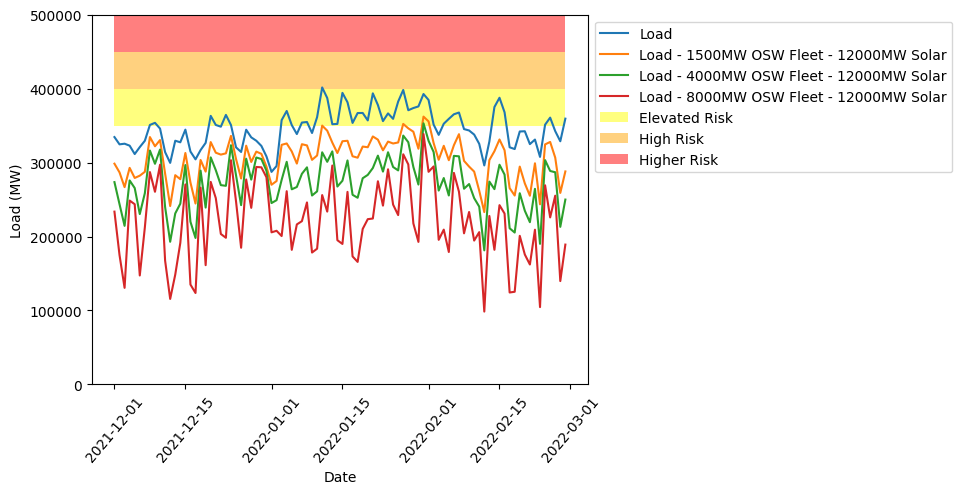

In [25]:
#Step 1: Import matplotlib as the plotting tool to use!
import matplotlib.pyplot as plt

#Step 2: Define a figure and axis.
fig, ax = plt.subplots()

#Step 3: Plot the data! Here we have the date on the x axis, with load on the y-axis.
ax.plot(analysis_data['Date'], analysis_data['Load'], label = 'Load')
ax.plot(analysis_data['Date'], analysis_data['Load - 1500MW OSW Fleet - 12000MW Solar'], label = 'Load - 1500MW OSW Fleet - 12000MW Solar')
ax.plot(analysis_data['Date'], analysis_data['Load - 4000MW OSW Fleet - 12000MW Solar'], label = 'Load - 4000MW OSW Fleet - 12000MW Solar')
ax.plot(analysis_data['Date'], analysis_data['Load - 8000MW OSW Fleet - 12000MW Solar'], label = 'Load - 8000MW OSW Fleet - 12000MW Solar')

#Step 4: Label the both the x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Load (MW)')

#Step 5: Set the x and y axis limits.
ax.set_ylim(ymin=0, ymax=500000)

#Step 6: Rotate the x axis time labels for better fit within the figure.
plt.xticks(rotation=50)

#Step 7: Define the risk regions.
plt.fill_between(analysis_data['Date'], 350000, 400000, color='yellow', alpha=0.5, linewidth = 0.0, label='Elevated Risk')
plt.fill_between(analysis_data['Date'], 400000, 450000, color='orange', alpha=0.5, linewidth = 0.0, label='High Risk')
plt.fill_between(analysis_data['Date'], 450000, 500000, color='red', alpha=0.5, linewidth = 0.0, label='Higher Risk')

#Step 8: Create the legend and show the plot!
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [26]:
#Step 9.1: Print the number of days with elevated risk
print("Days of Elevated Risk or greater with no OSW Fleet and no Solar: ", analysis_data[(analysis_data["Load"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 1500 MW OSW Fleet and 12000 MW of Solar: ", analysis_data[(analysis_data["Load - 1500MW OSW Fleet - 12000MW Solar"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 4000 MW OSW Fleet and 12000 MW of Solar: ", analysis_data[(analysis_data["Load - 4000MW OSW Fleet - 12000MW Solar"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 8000 MW OSW Fleet and 12000 MW of Solar: ", analysis_data[(analysis_data["Load - 8000MW OSW Fleet - 12000MW Solar"] > 350000)].shape[0])

Days of Elevated Risk or greater with no OSW Fleet and no Solar:  45
Days of Elevated Risk or greater with 1500 MW OSW Fleet and 12000 MW of Solar:  4
Days of Elevated Risk or greater with 4000 MW OSW Fleet and 12000 MW of Solar:  1
Days of Elevated Risk or greater with 8000 MW OSW Fleet and 12000 MW of Solar:  0


**Part 8:** Loop over all potential years to determine average number of days with elevated risk and plot this data!

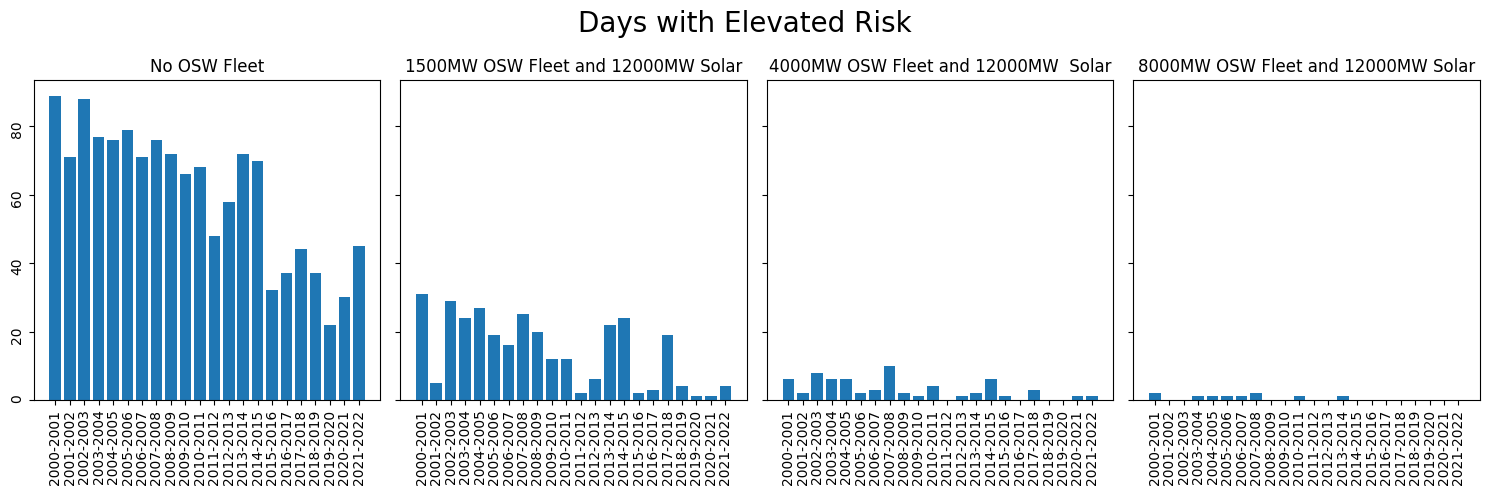

In [28]:
import warnings
warnings.filterwarnings("ignore")

#Step 1: Create a dataframe for the elevated risk data.
elevated_risk = pd.DataFrame(columns=['Year Range', 'No OSW Fleet', '1500MW OSW Fleet + 12000MW Solar', '4000 MW OSW Fleet + 12000MW Solar', '8000 MW OSW Fleet + 12000MW Solar'])

years_min=2000
years_max = 2022

i = years_min
while i < years_max:
  winter_year_one = i
  winter_year_two = i+1
  analysis_data = wind_solar_load_data.loc[((wind_solar_load_data['Date'].dt.year == winter_year_one) & (wind_solar_load_data['Date'].dt.month == 12)) | ((wind_solar_load_data['Date'].dt.year == winter_year_two) & ((wind_solar_load_data['Date'].dt.month == 1) | (wind_solar_load_data['Date'].dt.month == 2)))]
  analysis_data['Load - 1500MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 1500)
  analysis_data['Load - 4000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 4000)
  analysis_data['Load - 8000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 8000)
  analysis_data["Load - 1500MW OSW Fleet - 12000MW Solar"] = analysis_data["Load - 1500MW OSW Fleet"] - analysis_data["Solar Power"]
  analysis_data["Load - 4000MW OSW Fleet - 12000MW Solar"] = analysis_data["Load - 4000MW OSW Fleet"] - analysis_data["Solar Power"]
  analysis_data["Load - 8000MW OSW Fleet - 12000MW Solar"] = analysis_data["Load - 8000MW OSW Fleet"] - analysis_data["Solar Power"]
  analysis_data = analysis_data.drop(columns = ['Net CP for OSW Fleet'])
  analysis_data = analysis_data.drop(columns = ['Solar Power'])
  elevated_risk.loc[i - years_min] = [str(winter_year_one)+"-"+str(winter_year_two), analysis_data[analysis_data["Load"] > 350000].shape[0], analysis_data[(analysis_data["Load - 1500MW OSW Fleet - 12000MW Solar"] > 350000)].shape[0], analysis_data[(analysis_data["Load - 4000MW OSW Fleet - 12000MW Solar"] > 350000)].shape[0], analysis_data[analysis_data["Load - 8000MW OSW Fleet - 12000MW Solar"] > 350000].shape[0]]
  i+=1


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharey=True)
axes[0].bar(elevated_risk['Year Range'], elevated_risk['No OSW Fleet'], label='Days of Elevated Risk without OSW Fleet')
axes[1].bar(elevated_risk['Year Range'], elevated_risk['1500MW OSW Fleet + 12000MW Solar'], label='Days of Elevated Risk with 1500MW of OSW Fleet and 12000MW Solar')
axes[2].bar(elevated_risk['Year Range'], elevated_risk['4000 MW OSW Fleet + 12000MW Solar'], label='Days of Elevated Risk with 4000MW of OSW Fleet and 12000MW Solar')
axes[3].bar(elevated_risk['Year Range'], elevated_risk['8000 MW OSW Fleet + 12000MW Solar'], label='Days of Elevated Risk with 8000MW of OSW Fleet and 12000MW Solar')

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)
axes[3].tick_params(labelrotation=90)

plt.suptitle("Days with Elevated Risk", fontsize=20)
axes[0].set_title('No OSW Fleet')
axes[1].set_title('1500MW OSW Fleet and 12000MW Solar')
axes[2].set_title('4000MW OSW Fleet and 12000MW  Solar')
axes[3].set_title('8000MW OSW Fleet and 12000MW Solar')

plt.tight_layout()
plt.show()